In [140]:
import ast
from IPython.display import display, SVG
from graphviz import Digraph

In [215]:
def show_tree(code: str, output_filename: str=None):
    """
    display abstract syntax tree in IPython
    using graphviz
    """
    
    def add_node(graph: Digraph, node: ast.AST, parent: ast.AST=None):
        """
        add single node (and its children recursively) to syntax tree
        """
        class_name = type(node).__name__
        
        if class_name in ['Load', 'Store']:
            return

        name = None
        for attr in ['op', 'value', 'attr', 'arg', 'name', 'id']:
            if hasattr(node, attr):
                name = getattr(node, attr).__str__()

        graph.node(
            id(node).__str__(),
            class_name + (fr'\n{name}' if (name and not name.startswith('<')) else ''),
            fontname='Courier New',
        )

        if parent:
            graph.edge(id(parent).__str__(), id(node).__str__())
        for child in ast.iter_child_nodes(node):
            add_node(graph, child, node)

    graph = Digraph()

    add_node(graph, ast.parse(code))
    display(SVG(graph.pipe(format='svg')))

    if output_filename is not None:
        graph.render(output_filename, format='png')

In [216]:
code = \
'''
new_lambda = lambda x: x + 1
'''

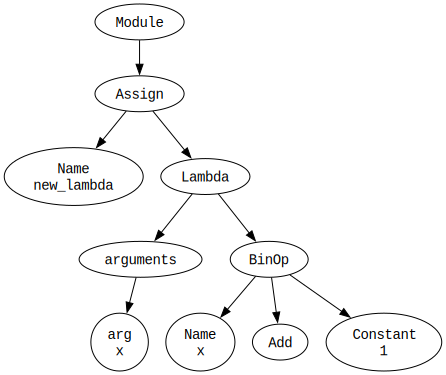

In [217]:
show_tree(code)

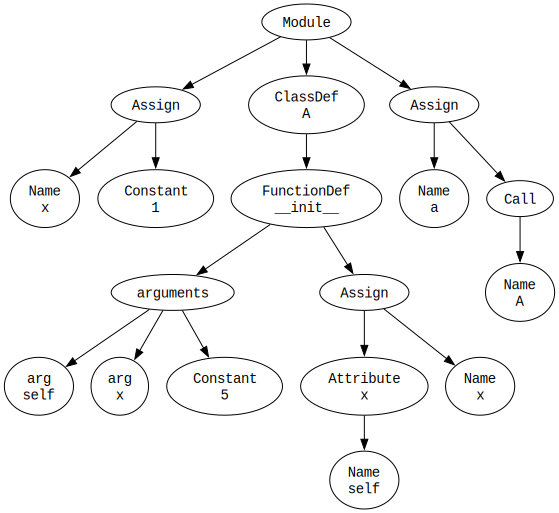

In [218]:
code = \
'''
x = 1
class A:
    def __init__(self, x=5):
        self.x = x

a = A()
'''

show_tree(code, output_filename='../tex/assets/ast-example')

In [219]:
tree = ast.parse(code)

def rec(root):
    for node in ast.iter_child_nodes(root):
        print(type(node))
        print('\tfields:', node._fields)
        for field in node._fields:
            if hasattr(getattr(node, field), '__str__'):
                print('\t\t', field, ':', getattr(node, field).__str__().strip())
        rec(node)

rec(tree)

<class 'ast.Assign'>
	fields: ('targets', 'value', 'type_comment')
		 targets : [<ast.Name object at 0x7cd9480ce990>]
		 value : <ast.Constant object at 0x7cd9480cea50>
		 type_comment : None
<class 'ast.Name'>
	fields: ('id', 'ctx')
		 id : x
		 ctx : <ast.Store object at 0x7cd953733990>
<class 'ast.Store'>
	fields: ()
<class 'ast.Constant'>
	fields: ('value', 'kind')
		 value : 1
		 kind : None
<class 'ast.ClassDef'>
	fields: ('name', 'bases', 'keywords', 'body', 'decorator_list', 'type_params')
		 name : A
		 bases : []
		 keywords : []
		 body : [<ast.FunctionDef object at 0x7cd9480ce890>]
		 decorator_list : []
		 type_params : []
<class 'ast.FunctionDef'>
	fields: ('name', 'args', 'body', 'decorator_list', 'returns', 'type_comment', 'type_params')
		 name : __init__
		 args : <ast.arguments object at 0x7cd9480cea10>
		 body : [<ast.Assign object at 0x7cd9480cd510>]
		 decorator_list : []
		 returns : None
		 type_comment : None
		 type_params : []
<class 'ast.arguments'>
	fields: